In [110]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import h5netcdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

In [111]:
path_1 = r"D:\G6sulfur\ARID_dataset_2090s_G6sulfur.nc"
arid = xr.open_dataset(path_1)
path_2 = r"D:\G6sulfur\COLD_dataset_2090s_G6sulfur.nc"
cold = xr.open_dataset(path_2)
path_3 = r"D:\G6sulfur\POLAR_dataset_2090s_G6sulfur.nc"
polar = xr.open_dataset(path_3)
path_4 = r"D:\G6sulfur\TEMP_dataset_2090s_G6sulfur.nc"
temperate = xr.open_dataset(path_4)
path_5 = r"D:\G6sulfur\TROPICAL_dataset_2090s_G6sulfur.nc"
tropical = xr.open_dataset(path_5)

define all variables 

In [112]:
BWh = arid['BWh'].values
BWk = arid['BWk'].values
BSh = arid['BSh'].values
BSk = arid['BSk'].values
Af = tropical['Af'].values
Am = tropical['Am'].values
Aw = tropical['Aw'].values
Csa = temperate['Csa'].values
Csb = temperate['Csb'].values
Csc = temperate['Csc'].values
Cwa = temperate['Cwa'].values
Cwb = temperate['Cwb'].values
Cwc = temperate['Cwc'].values
Cfa = temperate['Cfa'].values
Cfb = temperate['Cfb'].values
Cfc = temperate['Cfc'].values
Dsa = cold['Dsa'].values
Dsb = cold['Dsb'].values
Dsc = cold['Dsc'].values
Dsd = cold['Dsd'].values
Dwa = cold['Dwa'].values
Dwb = cold['Dwb'].values
Dwc = cold['Dwc'].values
Dwd = cold['Dwd'].values
Dfa = cold['Dfa'].values
Dfb = cold['Dfb'].values
Dfc = cold['Dfc'].values
Dfd = cold['Dfd'].values
ET = polar['ET'].values
EF = polar['EF'].values

create dictionary for each variable for each climate zone

In [113]:
climate_datasets = {
    "BWh": {"dataset": BWh, "variable": "BWh"},  
    "BWk": {"dataset": BWk, "variable": "BWk"},
    "BSh": {"dataset": BSh, "variable": "BSh"},
    "BSk": {"dataset": BSk, "variable": "BSk"},
    "Af": {"dataset": Af, "variable": "Af"},
    "Am": {"dataset": Am, "variable": "Am"},
    "Aw": {"dataset": Aw, "variable": "Aw"},
    "Csa": {"dataset": Csa, "variable": "Csa"},
    "Csb": {"dataset": Csb, "variable": "Csb"},
    "Csc": {"dataset": Csc, "variable": "Csc"},
    "Cwa": {"dataset": Cwa, "variable": "Cwa"},
    "Cwb": {"dataset": Cwb, "variable": "Cwb"},
    "Cwc": {"dataset": Cwc, "variable": "Cwc"},
    "Cfa": {"dataset": Cfa, "variable": "Cfa"},
    "Cfb": {"dataset": Cfb, "variable": "Cfb"},
    "Cfc": {"dataset": Cfc, "variable": "Cfc"},
    "Dsa": {"dataset": Dsa, "variable": "Dsa"},
    "Dsb": {"dataset": Dsb, "variable": "Dsb"},
    "Dsc": {"dataset": Dsc, "variable": "Dsc"},
    "Dsd": {"dataset": Dsd, "variable": "Dsd"},
    "Dwa": {"dataset": Dwa, "variable": "Dwa"},
    "Dwb": {"dataset": Dwb, "variable": "Dwb"},
    "Dwc": {"dataset": Dwc, "variable": "Dwc"},
    "Dwd": {"dataset": Dwd, "variable": "Dwd"},
    "Dfa": {"dataset": Dfa, "variable": "Dfa"},
    "Dfb": {"dataset": Dfb, "variable": "Dfb"},
    "Dfc": {"dataset": Dfc, "variable": "Dfc"},
    "Dfd": {"dataset": Dfd, "variable": "Dfd"},
    "ET": {"dataset": ET, "variable": "ET"},
    "EF": {"dataset": EF, "variable": "EF"},
}

create unique colormap to use pcolormesh: assign colors to each zone, then plot entire map

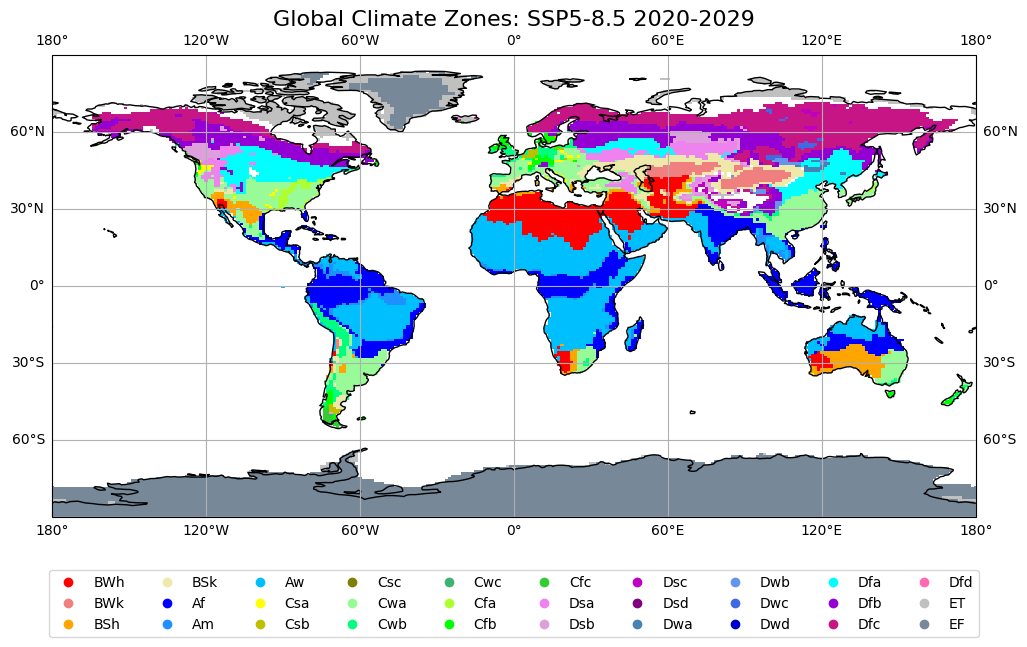

In [114]:
zone_ids = {"BWh": 1, "BWk": 2, "BSh": 3, "BSk": 4, "Af": 5, "Am":6, "Aw":7, "Csa":8, "Csb":9, "Csc":10, "Cwa":11, "Cwb":12, "Cwc":13, "Cfa":14, "Cfb":15, "Cfc":16, "Dsa":17, "Dsb":18, "Dsc":19, "Dsd":20,
            "Dwa":21, "Dwb":22, "Dwc":23, "Dwd":24, "Dfa":25, "Dfb":26, "Dfc":27, "Dfd":28, "EF":29, "ET":30}
zone_colors = {"BWh": "red", "BWk": "lightcoral", "BSh": "orange", "BSk": "palegoldenrod", "Af": "blue", "Am":"dodgerblue", "Aw":"deepskyblue", "Csa":"yellow", "Csb":"y",
              "Csc":"olive", "Cwa":"palegreen", "Cwb":"springgreen", "Cwc":"mediumseagreen", "Cfa":"greenyellow", "Cfb":"lime", "Cfc":"limegreen", "Dsa":"violet", "Dsb":"plum",
              "Dsc":"m", "Dsd":"purple", "Dwa":"steelblue", "Dwb":"cornflowerblue", "Dwc":"royalblue", "Dwd":"mediumblue", "Dfa":"aqua", "Dfb":"darkviolet", "Dfc":"mediumvioletred",
              "Dfd":"hotpink", "ET":"silver", "EF":"lightslategray"}

combined_grid = np.full_like(arid["lat"].values[:, None] * arid["lon"].values[None, :], np.nan)
#this is filling the combined grid so it represents all of the data points
for zone, info in climate_datasets.items():
    ds = info["dataset"]
    variable = info["variable"]
    data = ds
    mask = ~np.isnan(data) & (data > 0)  
    combined_grid[mask] = zone_ids[zone]

#creating custom colormap from color designations above
cmap = mcolors.ListedColormap([zone_colors[zone] for zone in zone_ids.keys()])
bounds = [0.5 + i for i in range(len(zone_ids) + 1)]
norm = mcolors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_title("Global Climate Zones: SSP5-8.5 2020-2029", fontsize=16)
lon, lat = np.meshgrid(arid["lon"].values, arid["lat"].values)
pcolormesh = ax.pcolormesh(lon, lat, combined_grid, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
#adding a legend/key :)
handles = [
    plt.Line2D([0], [0], marker="o", color=color, linestyle="", label=zone)
    for zone, color in zone_colors.items()
]
ax.legend(handles=handles, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=10)
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.savefig('/Users/jaybr/OneDrive/Desktop/UROP/SSP5_8.5_20s.png', bbox_inches='tight') 
plt.show()

In [115]:
clim_set = xr.Dataset()

In [116]:
clim_set['lat'] = tropical.lat
clim_set['lon'] = tropical.lon

In [117]:
clim_set['Af'] = (('lat', 'lon'), Af)
clim_set['Af'].attrs= {'long_name' : 'tropical rainforest'}
clim_set['Am'] = (('lat', 'lon'), Am)
clim_set['Am'].attrs= {'long_name' : 'tropical monsoon'}
clim_set['Aw'] = (('lat', 'lon'), Aw)
clim_set['Aw'].attrs= {'long_name' : 'tropical savannah'}

In [118]:
clim_set['BWh'] = (('lat', 'lon'), BWh)
clim_set['BWh'].attrs= {'long_name' : 'arid hot desert'}
clim_set['BWk'] = (('lat', 'lon'), BWk)
clim_set['BWk'].attrs= {'long_name' : 'arid cold desert'}
clim_set['BSh'] = (('lat', 'lon'), BSh)
clim_set['BSh'].attrs= {'long_name' : 'arid hot steppe'}
clim_set['BSk'] = (('lat', 'lon'), BSk)
clim_set['BSk'].attrs= {'long_name' : 'arid cold steppe'}

In [119]:
clim_set['Csa'] = (('lat', 'lon'), Csa)
clim_set['Csa'].attrs= {'long_name' : 'temperate dry hot summer'}
clim_set['Csb'] = (('lat', 'lon'), Csb)
clim_set['Csb'].attrs= {'long_name' : 'temperate dry warm summer'}
clim_set['Csc'] = (('lat', 'lon'), Csc)
clim_set['Csc'].attrs= {'long_name' : 'temperate dry cold summer'}

clim_set['Cwa'] = (('lat', 'lon'), Cwa)
clim_set['Cwa'].attrs= {'long_name' : 'temperate dry winter hot summer'}
clim_set['Cwb'] = (('lat', 'lon'), Cwb)
clim_set['Cwb'].attrs= {'long_name' : 'temperate dry winter warm summer'}
clim_set['Cwc'] = (('lat', 'lon'), Cwc)
clim_set['Cwc'].attrs= {'long_name' : 'temperate dry winter cold summer'}

clim_set['Cfa'] = (('lat', 'lon'), Cfa)
clim_set['Cfa'].attrs= {'long_name' : 'temperate without dry season hot summer'}
clim_set['Cfb'] = (('lat', 'lon'), Cfb)
clim_set['Cfb'].attrs= {'long_name' : 'temperate without dry season warm summer'}
clim_set['Cfc'] = (('lat', 'lon'), Cfc)
clim_set['Cfc'].attrs= {'long_name' : 'temperate without dry season cold summer'}

In [120]:
clim_set['Dsa'] = (('lat', 'lon'), Dsa)
clim_set['Dsa'].attrs= {'long_name' : 'cold dry hot summer'}
clim_set['Dsb'] = (('lat', 'lon'), Dsb)
clim_set['Dsb'].attrs= {'long_name' : 'cold dry warm summer'}
clim_set['Dsc'] = (('lat', 'lon'), Dsc)
clim_set['Dsc'].attrs= {'long_name' : 'cold dry cold summer'}
clim_set['Dsd'] = (('lat', 'lon'), Dsd)
clim_set['Dsd'].attrs= {'long_name' : 'cold dry summer very cold winter'}

clim_set['Dwa'] = (('lat', 'lon'), Dwa)
clim_set['Dwa'].attrs= {'long_name' : 'cold dry winter hot summer'}
clim_set['Dwb'] = (('lat', 'lon'), Dwb)
clim_set['Dwb'].attrs= {'long_name' : 'cold dry winter warm summer'}
clim_set['Dwc'] = (('lat', 'lon'), Dwc)
clim_set['Dwc'].attrs= {'long_name' : 'cold dry winter cold summer'}
clim_set['Dwd'] = (('lat', 'lon'), Dwd)
clim_set['Dwd'].attrs= {'long_name' : 'cold dry very cold winter'}

clim_set['Dfa'] = (('lat', 'lon'), Dfa)
clim_set['Dfa'].attrs= {'long_name' : 'cold without dry season hot summer'}
clim_set['Dfb'] = (('lat', 'lon'), Dfb)
clim_set['Dfb'].attrs= {'long_name' : 'cold without dry season warm summer'}
clim_set['Dfc'] = (('lat', 'lon'), Dfc)
clim_set['Dfc'].attrs= {'long_name' : 'cold without dry season cold summer'}
clim_set['Dfd'] = (('lat', 'lon'), Dfd)
clim_set['Dfd'].attrs= {'long_name' : 'cold without dry season very cold winter'}

In [121]:
clim_set['ET'] = (('lat', 'lon'), ET)
clim_set['ET'].attrs= {'long_name' : 'polar tundra'}
clim_set['EF'] = (('lat', 'lon'), EF)
clim_set['EF'].attrs= {'long_name' : 'polar frost'}

In [122]:
clim_set

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables: (12/30)
    Af       (lat, lon) bool False False False False ... False False False False
    Am       (lat, lon) bool False False False False ... False False False False
    Aw       (lat, lon) bool False False False False ... False False False False
    BWh      (lat, lon) bool False False False False ... False False False False
    BWk      (lat, lon) bool False False False False ... False False False False
    BSh      (lat, lon) bool False False False False ... False False False False
    ...       ...
    Dfa      (lat, lon) bool False False False False ... False False False False
    Dfb      (lat, lon) bool False False False False ... False False False False
    Dfc      (lat, lon) bool False False False False ... False False False False
    Dfd      (lat, lon) bool False False False False ... False False False False
    ET       (lat, lon) bool False False False False ... False False False False
    EF       (lat, lon) bool True True True True ... False False False False

In [123]:
clim_set.to_netcdf(path='/Users/jaybr/OneDrive/Desktop/UROP/koppen-geiger_dataset_2090s_G6sulfur.nc', mode='w')